# Real-Time Traffic Flow Analysis and Forecasting Using FireDucks

## Project Objective

The aim of this project is to build a robust, real-time traffic flow analysis system that leverages the high-performance capabilities of FireDucks—a compiler-accelerated DataFrame library fully compatible with pandas. By utilizing a real-world traffic dataset from Kaggle, the project will:

- **Accelerate Data Processing:** Replace pandas with FireDucks to drastically reduce data preprocessing time.
- **Extract Insights:** Clean, transform, and analyze traffic data to uncover patterns, trends, and anomalies.
- **Forecast Traffic Flow:** Develop predictive models to anticipate future traffic conditions.
- **Support Decision-Making:** Provide real-time, actionable insights that help urban planners and businesses optimize traffic management and reduce congestion.

This project not only demonstrates the practical benefits of using FireDucks in data-intensive applications but also addresses a critical challenge in modern urban mobility.

In [ ]:
!pip install fireducks

In [ ]:
print("Hello World!")

Hello World!


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/traffic-flow-forecasting-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.42M/4.42M [00:00<00:00, 85.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rabieelkharoua/traffic-flow-forecasting-dataset/versions/7


In [ ]:
!ls

'kaggle_dataset_1_Traffic_Project (1).zip'   kaggle_dataset_1_Traffic_Project.zip   sample_data


In [ ]:
!unzip kaggle_dataset_1_Traffic_Project.zip

Archive:  kaggle_dataset_1_Traffic_Project.zip
replace tra_Y_te.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tra_Y_tr.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tra_adj_mat.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace trafficflowforecasting-1/Traffic Flow Prediction Dataset.docx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace trafficflowforecasting-1/traffic_dataset.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import os

base_path = "/content/drive/MyDrive/Fireducks/blogathon"
train_file = os.path.join(base_path, "tra_Y_tr.csv")
test_file = os.path.join(base_path, "tra_Y_te.csv")
adj_file = os.path.join(base_path, "tra_adj_mat.csv")

print(os.listdir(base_path))

['tra_Y_te.csv', 'tra_adj_mat.csv', 'tra_Y_tr.csv', 'trafficflowforecasting-1', '.ipynb_checkpoints']


In [ ]:
import os
import fireducks.pandas as pd  # Using FireDucks (drop-in replacement for pandas)

# Define the base path to your dataset folder on Google Drive
base_path = "/content/drive/MyDrive/Fireducks/blogathon"

# Define file paths for the three CSV files
train_file = os.path.join(base_path, "tra_Y_tr.csv")
test_file = os.path.join(base_path, "tra_Y_te.csv")
adj_file = os.path.join(base_path, "tra_adj_mat.csv")

# Load each CSV into a DataFrame
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)
df_adj = pd.read_csv(adj_file)

# Display details for the training dataset
print("Training Data (tra_Y_tr.csv):")
print("Shape:", df_train.shape)
print("Columns:", df_train.columns.tolist())
print("\n---------------------------------------\n")

# Display details for the test dataset
print("Test Data (tra_Y_te.csv):")
print("Shape:", df_test.shape)
print("Columns:", df_test.columns.tolist())
print("\n---------------------------------------\n")

# Display details for the adjacency matrix dataset
print("Adjacency Matrix (tra_adj_mat.csv):")
print("Shape:", df_adj.shape)
print("Columns:", df_adj.columns.tolist())


Training Data (tra_Y_tr.csv):
Shape: (36, 1261)
Columns: ['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9', 'Var10', 'Var11', 'Var12', 'Var13', 'Var14', 'Var15', 'Var16', 'Var17', 'Var18', 'Var19', 'Var20', 'Var21', 'Var22', 'Var23', 'Var24', 'Var25', 'Var26', 'Var27', 'Var28', 'Var29', 'Var30', 'Var31', 'Var32', 'Var33', 'Var34', 'Var35', 'Var36', 'Var37', 'Var38', 'Var39', 'Var40', 'Var41', 'Var42', 'Var43', 'Var44', 'Var45', 'Var46', 'Var47', 'Var48', 'Var49', 'Var50', 'Var51', 'Var52', 'Var53', 'Var54', 'Var55', 'Var56', 'Var57', 'Var58', 'Var59', 'Var60', 'Var61', 'Var62', 'Var63', 'Var64', 'Var65', 'Var66', 'Var67', 'Var68', 'Var69', 'Var70', 'Var71', 'Var72', 'Var73', 'Var74', 'Var75', 'Var76', 'Var77', 'Var78', 'Var79', 'Var80', 'Var81', 'Var82', 'Var83', 'Var84', 'Var85', 'Var86', 'Var87', 'Var88', 'Var89', 'Var90', 'Var91', 'Var92', 'Var93', 'Var94', 'Var95', 'Var96', 'Var97', 'Var98', 'Var99', 'Var100', 'Var101', 'Var102', 'Var103', 'Var104', 'Var105', 

In [ ]:
# Traditional pandas approach

import time
import pandas as pd

start_pd = time.time()
df_train_pd = pd.read_csv(train_file)
end_pd = time.time()

print("Pandas - Training Data Shape:", df_train_pd.shape)
print(df_train_pd.head())
print(f"Pandas load time: {end_pd - start_pd:.4f} seconds")


# Assuming the dataset contains a 'timestamp' column and a 'traffic_flow' column.
# Adjust column names as necessary.
if 'timestamp' in df_train_pd.columns and 'traffic_flow' in df_train_pd.columns:
    df_train_pd['timestamp'] = pd.to_datetime(df_train_pd['timestamp'], errors='coerce')
    df_train_pd['hour'] = df_train_pd['timestamp'].dt.hour
    avg_pd = df_train_pd.groupby('hour')['traffic_flow'].mean().reset_index()
    print("Pandas - Average Traffic Flow by Hour:")
    print(avg_pd)


Pandas - Training Data Shape: (36, 1261)
       Var1      Var2      Var3      Var4      Var5      Var6      Var7  \
0  0.050911  0.047641  0.044839  0.059785  0.062588  0.063989  0.088277   
1  0.046240  0.049510  0.052312  0.046707  0.057450  0.055582  0.077534   
2  0.050444  0.044372  0.050444  0.050444  0.043438  0.066791  0.069127   
3  0.044839  0.038300  0.051378  0.050444  0.045773  0.048108  0.056983   
4  0.044839  0.053246  0.056516  0.049043  0.041569  0.049977  0.047641   

       Var8      Var9     Var10  ...   Var1252   Var1253   Var1254   Var1255  \
0  0.113498  0.122840  0.125175  ...  0.071462  0.080336  0.098085  0.147595   
1  0.094348  0.097151  0.107426  ...  0.054180  0.081738  0.074731  0.120504   
2  0.070061  0.095750  0.079869  ...  0.044372  0.068660  0.072863  0.104157   
3  0.059785  0.077534  0.077534  ...  0.054647  0.070995  0.073797  0.098085   
4  0.065390  0.061653  0.063055  ...  0.058851  0.053713  0.054647  0.068192   

    Var1256   Var1257   Var

In [ ]:
import fireducks.pandas as fpd  # FireDucks uses the same API as pandas

start_fd = time.time()
df_train_fd = fpd.read_csv(train_file)

df_train_fd._evaluate()
end_fd = time.time()

print("FireDucks - Training Data Shape:", df_train_fd.shape)
print(df_train_fd.head())
print(f"FireDucks load time: {end_fd - start_fd:.4f} seconds")

# Data Preprocessing Example:
# Using the same operations as with pandas for comparison.
if 'timestamp' in df_train_fd.columns and 'traffic_flow' in df_train_fd.columns:
    df_train_fd['timestamp'] = fpd.to_datetime(df_train_fd['timestamp'], errors='coerce')
    df_train_fd['hour'] = df_train_fd['timestamp'].dt.hour
    avg_fd = df_train_fd.groupby('hour')['traffic_flow'].mean().reset_index()
    avg_fd._evaluate()  # Ensure lazy computations are executed
    print("FireDucks - Average Traffic Flow by Hour:")
    print(avg_fd)


FireDucks - Training Data Shape: (36, 1261)
       Var1      Var2      Var3      Var4      Var5      Var6      Var7  \
0  0.050911  0.047641  0.044839  0.059785  0.062588  0.063989  0.088277   
1  0.046240  0.049510  0.052312  0.046707  0.057450  0.055582  0.077534   
2  0.050444  0.044372  0.050444  0.050444  0.043438  0.066791  0.069127   
3  0.044839  0.038300  0.051378  0.050444  0.045773  0.048108  0.056983   
4  0.044839  0.053246  0.056516  0.049043  0.041569  0.049977  0.047641   

       Var8      Var9     Var10  ...   Var1252   Var1253   Var1254   Var1255  \
0  0.113498  0.122840  0.125175  ...  0.071462  0.080336  0.098085  0.147595   
1  0.094348  0.097151  0.107426  ...  0.054180  0.081738  0.074731  0.120504   
2  0.070061  0.095750  0.079869  ...  0.044372  0.068660  0.072863  0.104157   
3  0.059785  0.077534  0.077534  ...  0.054647  0.070995  0.073797  0.098085   
4  0.065390  0.061653  0.063055  ...  0.058851  0.053713  0.054647  0.068192   

    Var1256   Var1257   

In [ ]:
import pandas as pd  # Traditional pandas

# Load training data using traditional pandas
df_train_trad = pd.read_csv(train_file)
print("Traditional pandas training data shape:", df_train_trad.shape)

# Transpose the training data: now rows = time steps, columns = sensors
df_train_trad_t = df_train_trad.transpose()
df_train_trad_t.columns = [f"Sensor_{i+1}" for i in range(df_train_trad_t.shape[1])]
print("After transpose, shape:", df_train_trad_t.shape)

# Compute average traffic flow by averaging sensor data (axis=1)
avg_flow_pd = df_train_trad_t.mean(axis=1).reset_index()
avg_flow_pd.columns = ['Time_Step', 'Avg_Traffic']
print("Average Traffic Flow by Time Step:")
print(avg_flow_pd.head())


Traditional pandas training data shape: (36, 1261)
After transpose, shape: (1261, 36)
Average Traffic Flow by Time Step:
  Time_Step  Avg_Traffic
0      Var1     0.060719
1      Var2     0.061251
2      Var3     0.061926
3      Var4     0.065520
4      Var5     0.063820


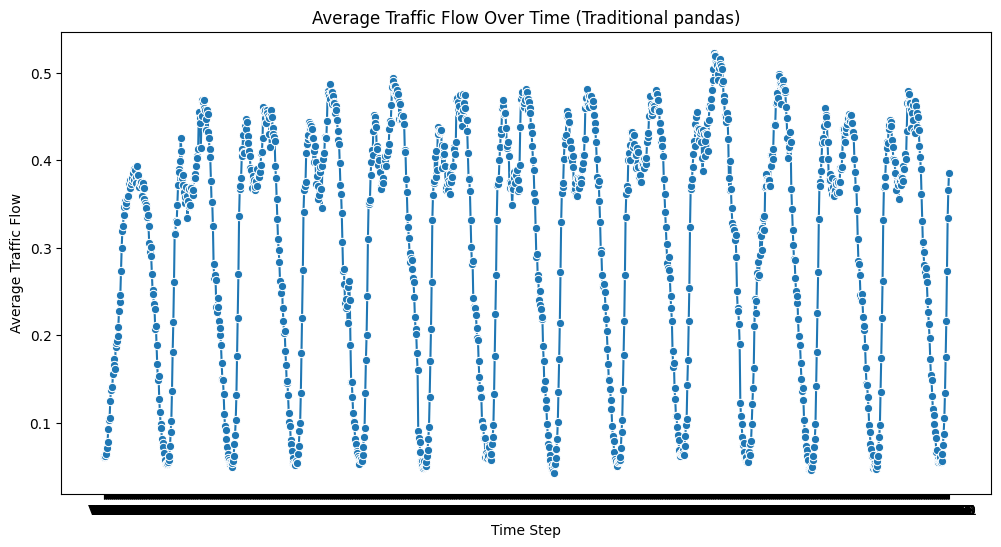

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_flow_pd, x='Time_Step', y='Avg_Traffic', marker='o')
plt.title("Average Traffic Flow Over Time (Traditional pandas)")
plt.xlabel("Time Step")
plt.ylabel("Average Traffic Flow")
plt.show()


FireDucks - Training Data Shape: (36, 1261)
       Var1      Var2      Var3      Var4      Var5      Var6      Var7  \
0  0.050911  0.047641  0.044839  0.059785  0.062588  0.063989  0.088277   
1  0.046240  0.049510  0.052312  0.046707  0.057450  0.055582  0.077534   
2  0.050444  0.044372  0.050444  0.050444  0.043438  0.066791  0.069127   
3  0.044839  0.038300  0.051378  0.050444  0.045773  0.048108  0.056983   
4  0.044839  0.053246  0.056516  0.049043  0.041569  0.049977  0.047641   

       Var8      Var9     Var10  ...   Var1252   Var1253   Var1254   Var1255  \
0  0.113498  0.122840  0.125175  ...  0.071462  0.080336  0.098085  0.147595   
1  0.094348  0.097151  0.107426  ...  0.054180  0.081738  0.074731  0.120504   
2  0.070061  0.095750  0.079869  ...  0.044372  0.068660  0.072863  0.104157   
3  0.059785  0.077534  0.077534  ...  0.054647  0.070995  0.073797  0.098085   
4  0.065390  0.061653  0.063055  ...  0.058851  0.053713  0.054647  0.068192   

    Var1256   Var1257   

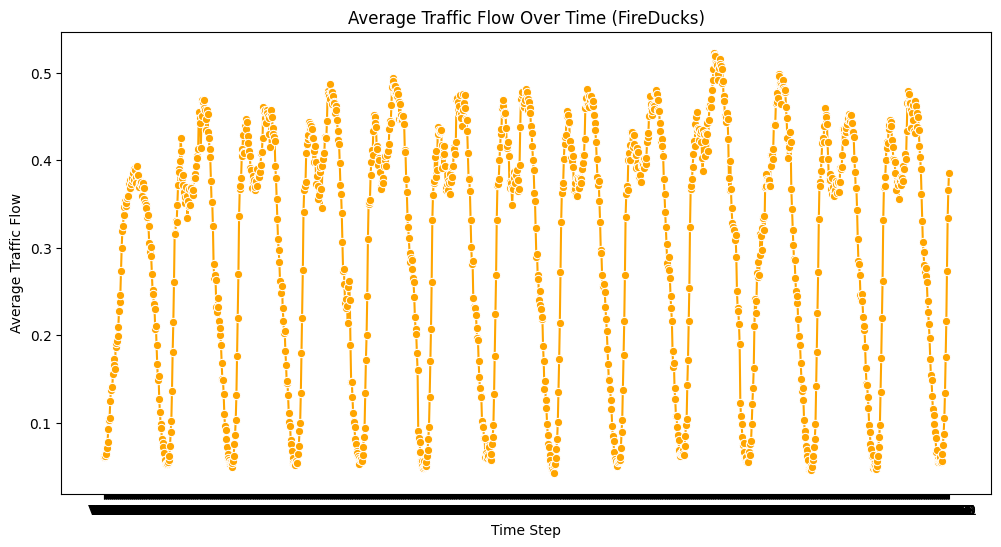

In [ ]:
import fireducks.pandas as pd  # Import FireDucks as a drop-in for pandas
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Define file path (adjust as needed)
train_file = "/content/drive/MyDrive/Fireducks/blogathon/tra_Y_tr.csv"

# Load training data using FireDucks
start_fd_load = time.time()
df_train_fd = pd.read_csv(train_file)
df_train_fd._evaluate()  # Force lazy evaluation if needed
end_fd_load = time.time()
print("FireDucks - Training Data Shape:", df_train_fd.shape)
print(df_train_fd.head())
print(f"FireDucks load time: {end_fd_load - start_fd_load:.4f} seconds")

# Transpose the training DataFrame so that rows become time steps and columns become sensors
df_train_fd_t = df_train_fd.transpose()
# Rename columns (e.g., Sensor_1, Sensor_2, …)
df_train_fd_t.columns = [f"Sensor_{i+1}" for i in range(df_train_fd_t.shape[1])]
df_train_fd_t._evaluate()  # Force evaluation

print("After transpose, shape:", df_train_fd_t.shape)

# Compute the average traffic flow across sensors for each time step
start_fd_agg = time.time()
avg_flow_fd = df_train_fd_t.mean(axis=1).reset_index()
avg_flow_fd.columns = ['Time_Step', 'Avg_Traffic']
avg_flow_fd._evaluate()  # Ensure the lazy evaluation is executed
end_fd_agg = time.time()

print("FireDucks - Average Traffic Flow by Time Step:")
print(avg_flow_fd.head())
print(f"FireDucks aggregation time: {end_fd_agg - start_fd_agg:.4f} seconds")

# Visualization: Plot average traffic flow over time using FireDucks result
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_flow_fd, x='Time_Step', y='Avg_Traffic', marker='o', color='orange')
plt.title("Average Traffic Flow Over Time (FireDucks)")
plt.xlabel("Time Step")
plt.ylabel("Average Traffic Flow")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Traditional pandas:
Training Data Shape: (36, 1261)
After Transpose Shape: (1261, 36)
Average Traffic Flow (first 5 rows):
  Time_Step  Avg_Traffic
0      Var1     0.060719
1      Var2     0.061251
2      Var3     0.061926
3      Var4     0.065520
4      Var5     0.063820
Total time (pandas): 0.0390 seconds

FireDucks:
Training Data Shape: (36, 1261)
After Transpose Shape: (1261, 36)
Average Traffic Flow (first 5 rows):
  Time_Step  Avg_Traffic
0      Var1     0.060719
1      Var2     0.061251
2      Var3     0.061926
3      Var4     0.065520
4      Var5     0.063820
Total time (FireDucks): 0.2391 seconds



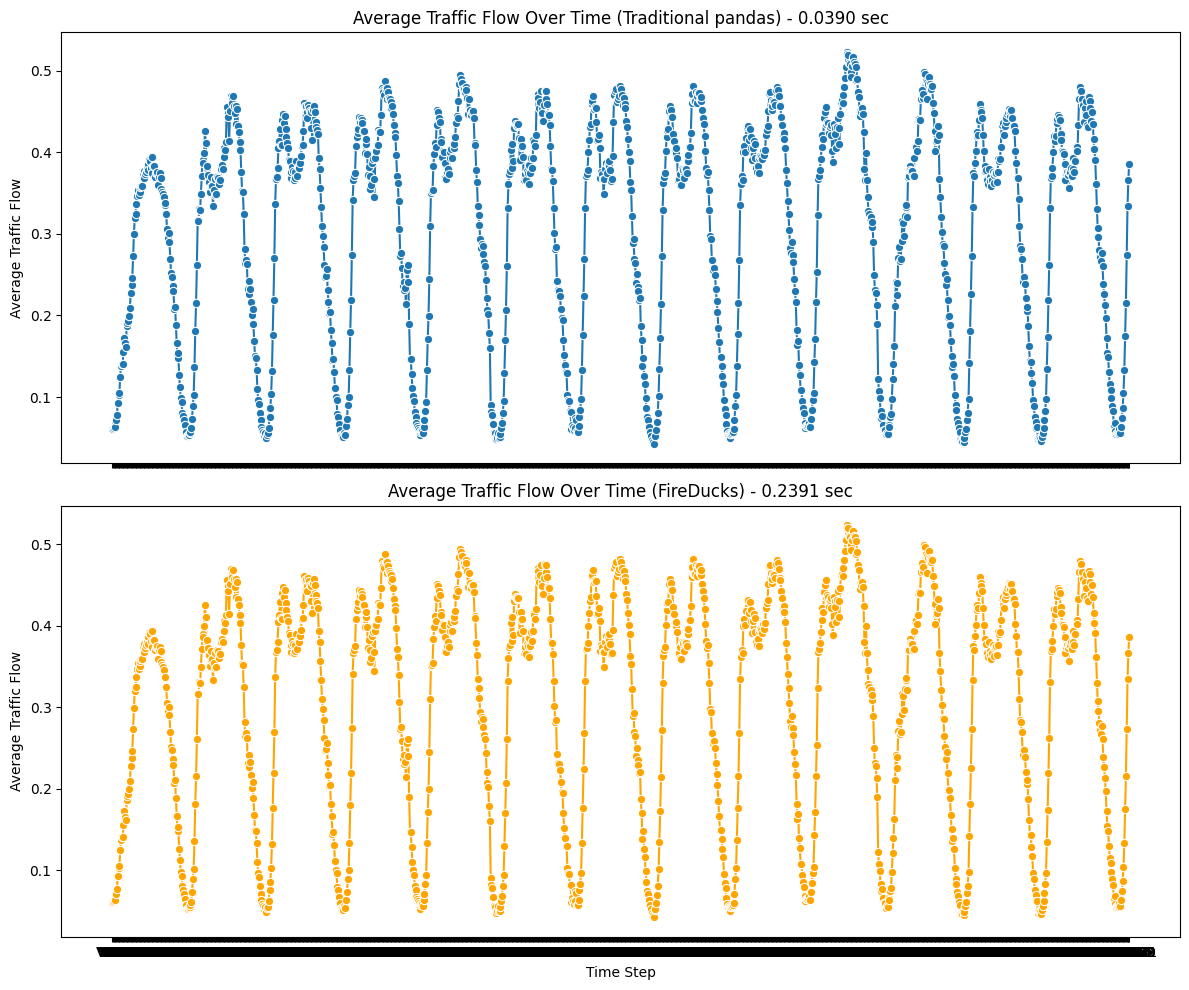

In [ ]:
# Step 1: Mount Google Drive to access dataset files
from google.colab import drive
drive.mount('/content/drive')

import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Define file path for the training data from the unzipped dataset
base_path = "/content/drive/MyDrive/Fireducks/blogathon"
train_file = os.path.join(base_path, "tra_Y_tr.csv")

##########################################
# Traditional pandas Workflow
##########################################
import pandas as pd  # standard pandas

start_pd = time.time()
# Load the training CSV using pandas
df_train_pd = pd.read_csv(train_file)
# Transpose: rows become time steps, columns become sensors
df_train_pd_t = df_train_pd.transpose()
df_train_pd_t.columns = [f"Sensor_{i+1}" for i in range(df_train_pd_t.shape[1])]
# Compute average traffic flow (across sensors) for each time step
avg_flow_pd = df_train_pd_t.mean(axis=1).reset_index()
avg_flow_pd.columns = ['Time_Step', 'Avg_Traffic']
time_pd = time.time() - start_pd

print("Traditional pandas:")
print("Training Data Shape:", df_train_pd.shape)
print("After Transpose Shape:", df_train_pd_t.shape)
print("Average Traffic Flow (first 5 rows):")
print(avg_flow_pd.head())
print(f"Total time (pandas): {time_pd:.4f} seconds\n")

##########################################
# FireDucks Workflow
##########################################
import fireducks.pandas as fpd  # FireDucks drop-in replacement for pandas

start_fd = time.time()
# Load the training CSV using FireDucks
df_train_fd = fpd.read_csv(train_file)
# Transpose the DataFrame so that rows become time steps and columns become sensors
df_train_fd_t = df_train_fd.transpose()
df_train_fd_t.columns = [f"Sensor_{i+1}" for i in range(df_train_fd_t.shape[1])]
# Force lazy evaluation (if needed)
df_train_fd_t._evaluate()
# Compute average traffic flow across sensors for each time step
avg_flow_fd = df_train_fd_t.mean(axis=1).reset_index()
avg_flow_fd.columns = ['Time_Step', 'Avg_Traffic']
avg_flow_fd._evaluate()  # Force evaluation to complete computation
time_fd = time.time() - start_fd

print("FireDucks:")
print("Training Data Shape:", df_train_fd.shape)
print("After Transpose Shape:", df_train_fd_t.shape)
print("Average Traffic Flow (first 5 rows):")
print(avg_flow_fd.head())
print(f"Total time (FireDucks): {time_fd:.4f} seconds\n")

##########################################
# Visualization: Compare Both Approaches
##########################################
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

sns.lineplot(ax=axes[0], data=avg_flow_pd, x='Time_Step', y='Avg_Traffic', marker='o')
axes[0].set_title(f"Average Traffic Flow Over Time (Traditional pandas) - {time_pd:.4f} sec")
axes[0].set_xlabel("Time Step")
axes[0].set_ylabel("Average Traffic Flow")

sns.lineplot(ax=axes[1], data=avg_flow_fd, x='Time_Step', y='Avg_Traffic', marker='o', color='orange')
axes[1].set_title(f"Average Traffic Flow Over Time (FireDucks) - {time_fd:.4f} sec")
axes[1].set_xlabel("Time Step")
axes[1].set_ylabel("Average Traffic Flow")

plt.tight_layout()
plt.show()


Correlation between Pandas and FireDucks average flows: 0.9999999999999998


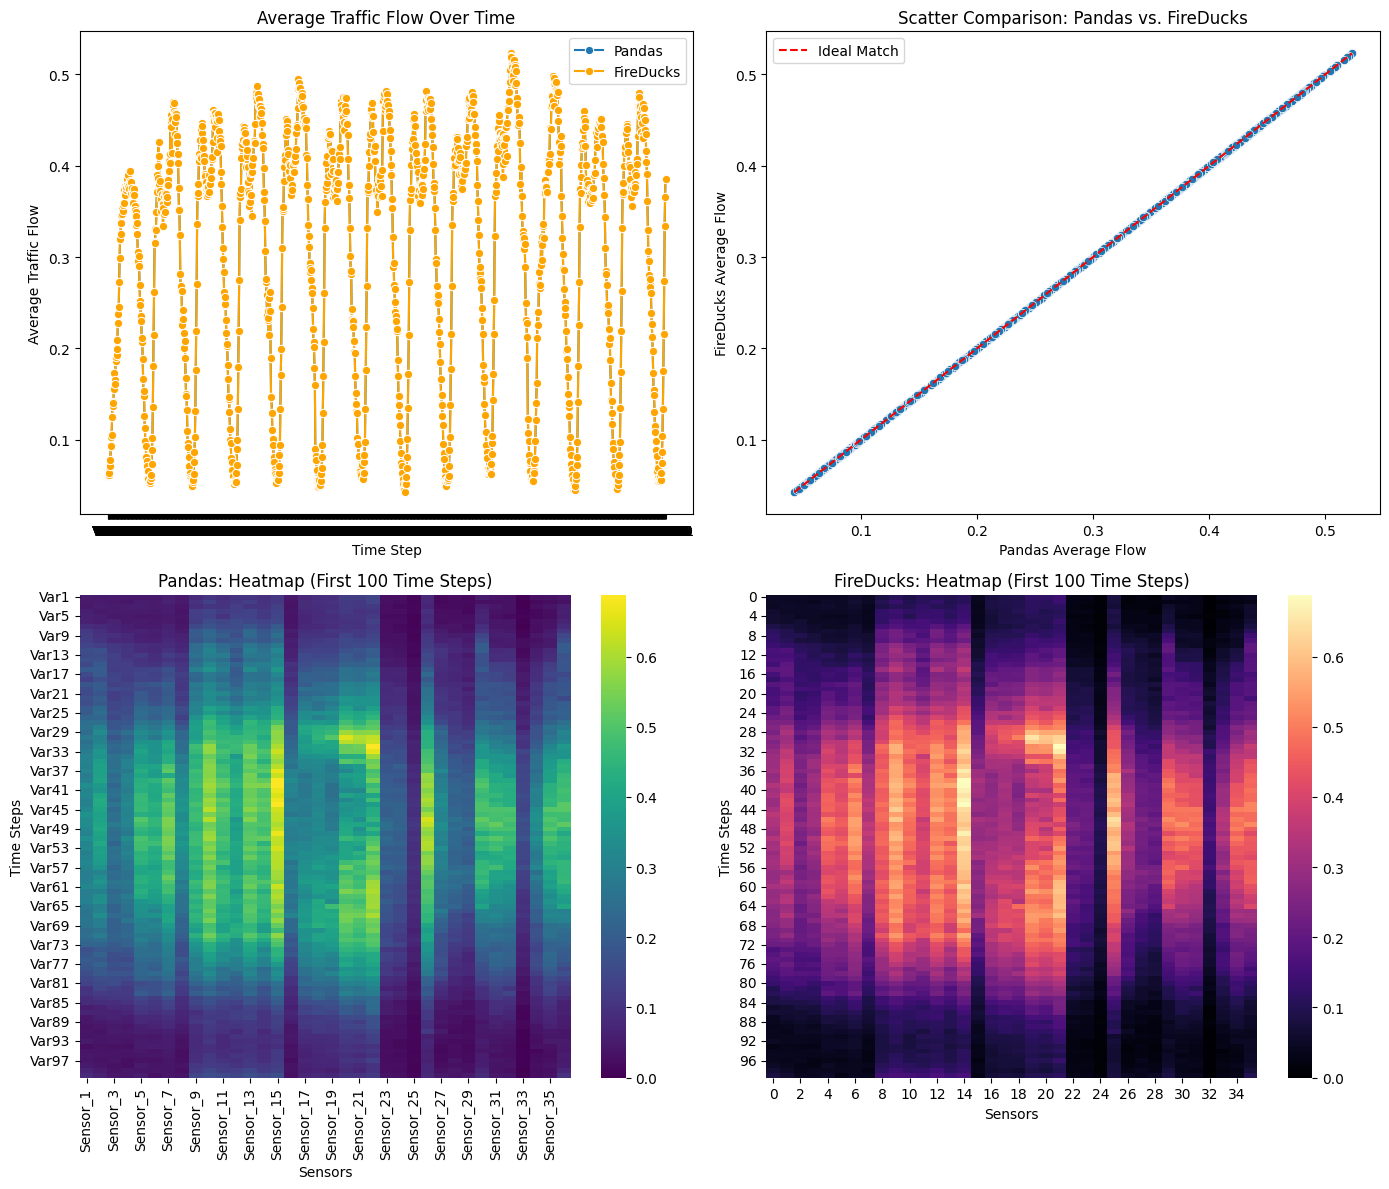

Summary Statistics Comparison:
        Pandas                                                              \
      Sensor_1  Sensor_2  Sensor_3  Sensor_4  Sensor_5  Sensor_6  Sensor_7   
mean  0.247922  0.332230  0.215223  0.247887  0.332105  0.314784  0.357134   
min   0.014479  0.012144  0.017749  0.021485  0.022887  0.024288  0.024755   
max   0.480149  0.759925  0.460065  0.485754  0.719757  0.617001  0.722092   

                                    ... FireDucks                      \
      Sensor_8  Sensor_9 Sensor_10  ... Sensor_27 Sensor_28 Sensor_29   
mean  0.265750  0.369579  0.440234  ...  0.254512  0.166148  0.125222   
min   0.011677  0.050911  0.061186  ...  0.012611  0.001401  0.004204   
max   0.524988  0.708080  0.880897  ...  0.468473  0.861280  0.357777   

                                                                            
     Sensor_30 Sensor_31 Sensor_32 Sensor_33 Sensor_34 Sensor_35 Sensor_36  
mean  0.349077  0.356175  0.340740  0.110023  0.239642  0.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -- ASSUMPTION: The following variables are already computed from previous cells --
# Traditional pandas workflow:
#   df_train_trad_t: transposed training data from tra_Y_tr.csv (shape: (1261, 36))
#   avg_flow_pd: DataFrame with average traffic flow over time from pandas,
#                with columns ['Time_Step', 'Avg_Traffic']

# FireDucks workflow:
#   df_train_fd_t: transposed training data loaded with FireDucks (same shape)
#   avg_flow_fd: DataFrame with average traffic flow over time from FireDucks,
#                with columns ['Time_Step', 'Avg_Traffic']
#
# For demonstration, we merge and compare the average traffic flows:

# Merge the two results on Time_Step
comparison_df = pd.merge(avg_flow_pd, avg_flow_fd, on='Time_Step', suffixes=('_pandas', '_fireducks'))
corr_value = comparison_df['Avg_Traffic_pandas'].corr(comparison_df['Avg_Traffic_fireducks'])
print("Correlation between Pandas and FireDucks average flows:", corr_value)

# Create a multi-panel figure for the comparison

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Line Plot: Overlay average traffic flows
sns.lineplot(ax=axes[0,0], data=avg_flow_pd, x='Time_Step', y='Avg_Traffic', marker='o', label='Pandas')
sns.lineplot(ax=axes[0,0], data=avg_flow_fd, x='Time_Step', y='Avg_Traffic', marker='o', label='FireDucks', color='orange')
axes[0,0].set_title("Average Traffic Flow Over Time")
axes[0,0].set_xlabel("Time Step")
axes[0,0].set_ylabel("Average Traffic Flow")
axes[0,0].legend()

# 2. Scatter Plot: Compare individual average flow values
sns.scatterplot(ax=axes[0,1], x='Avg_Traffic_pandas', y='Avg_Traffic_fireducks', data=comparison_df)
# Plot ideal diagonal line
min_val = comparison_df[['Avg_Traffic_pandas', 'Avg_Traffic_fireducks']].min().min()
max_val = comparison_df[['Avg_Traffic_pandas', 'Avg_Traffic_fireducks']].max().max()
axes[0,1].plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Match')
axes[0,1].set_title("Scatter Comparison: Pandas vs. FireDucks")
axes[0,1].set_xlabel("Pandas Average Flow")
axes[0,1].set_ylabel("FireDucks Average Flow")
axes[0,1].legend()

# 3. Heatmap: Display a subset (first 100 time steps) of traditional pandas data
subset_pd = df_train_trad_t.iloc[:100, :]
sns.heatmap(subset_pd, ax=axes[1,0], cmap="viridis")
axes[1,0].set_title("Pandas: Heatmap (First 100 Time Steps)")
axes[1,0].set_xlabel("Sensors")
axes[1,0].set_ylabel("Time Steps")

# 4. Heatmap: Display a subset of FireDucks data (first 100 time steps)
subset_fd = df_train_fd_t.iloc[:100, :].copy()
subset_fd._evaluate()  # force evaluation in FireDucks
sns.heatmap(subset_fd, ax=axes[1,1], cmap="magma")
axes[1,1].set_title("FireDucks: Heatmap (First 100 Time Steps)")
axes[1,1].set_xlabel("Sensors")
axes[1,1].set_ylabel("Time Steps")

plt.tight_layout()
plt.show()

# Summary Statistics: Compare key stats from both approaches
stats_pd = df_train_trad_t.describe().loc[['mean', 'min', 'max']]
stats_fd = df_train_fd_t.describe().loc[['mean', 'min', 'max']]
summary = pd.concat([stats_pd, stats_fd], axis=1, keys=['Pandas', 'FireDucks'])
print("Summary Statistics Comparison:")
print(summary)
